In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)
file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)
df.head(374)




Using Colab cache for faster access to the 'sleep-health-and-lifestyle-dataset' dataset.
Path to dataset files: /kaggle/input/sleep-health-and-lifestyle-dataset


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


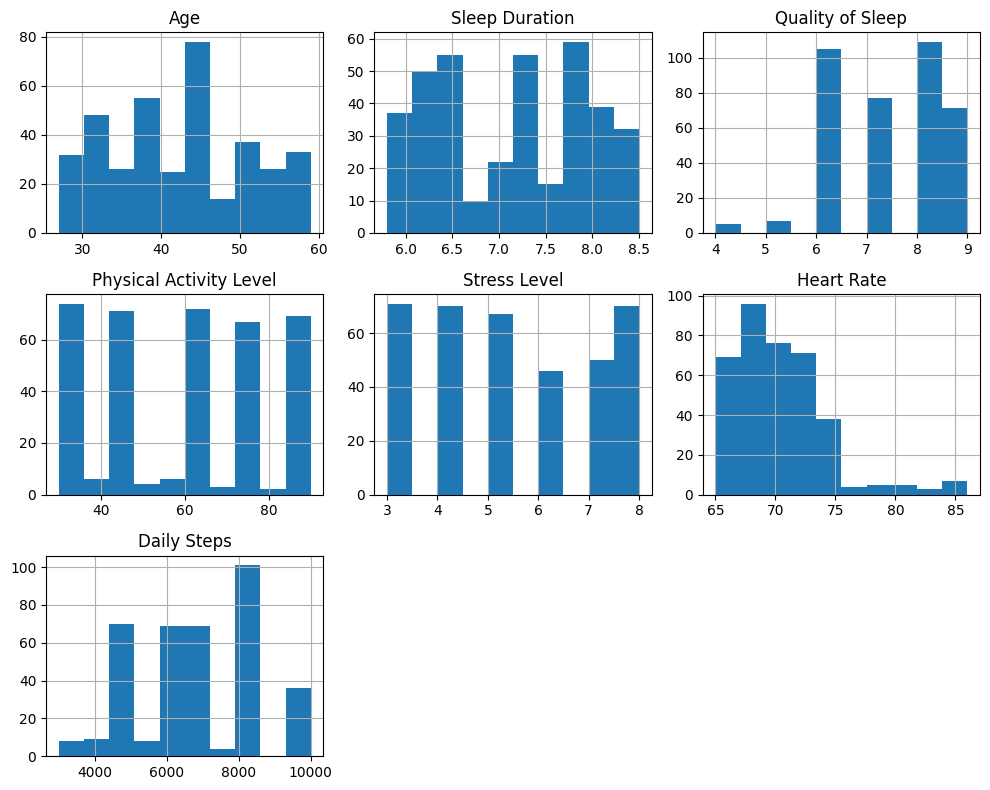

In [ ]:
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

df[num_cols].hist(figsize=(10,8));
plt.tight_layout()

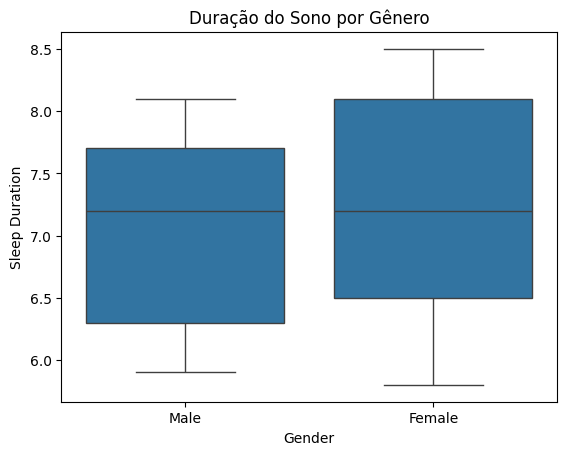

In [ ]:
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Duração do Sono por Gênero')
plt.show()

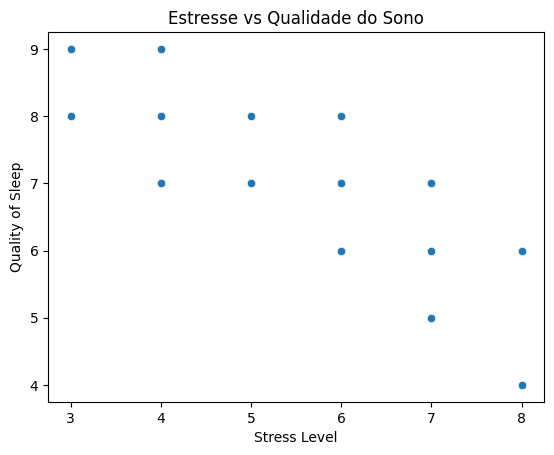

In [ ]:
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title('Estresse vs Qualidade do Sono')
plt.show()

In [ ]:
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in cat_cols:
    print(f"\nDistribuição de {col}")
    print(df[col].value_counts())




Distribuição de Gender
Gender
Male      189
Female    185
Name: count, dtype: int64

Distribuição de Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Distribuição de BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Distribuição de Sleep Disorder
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


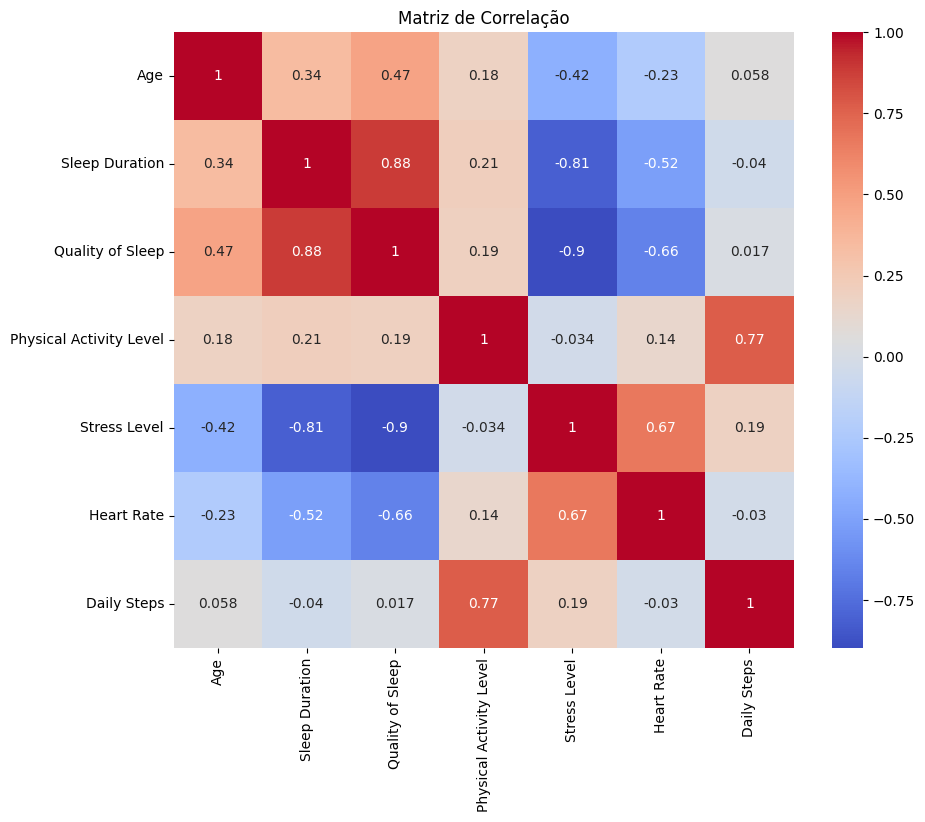

In [ ]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


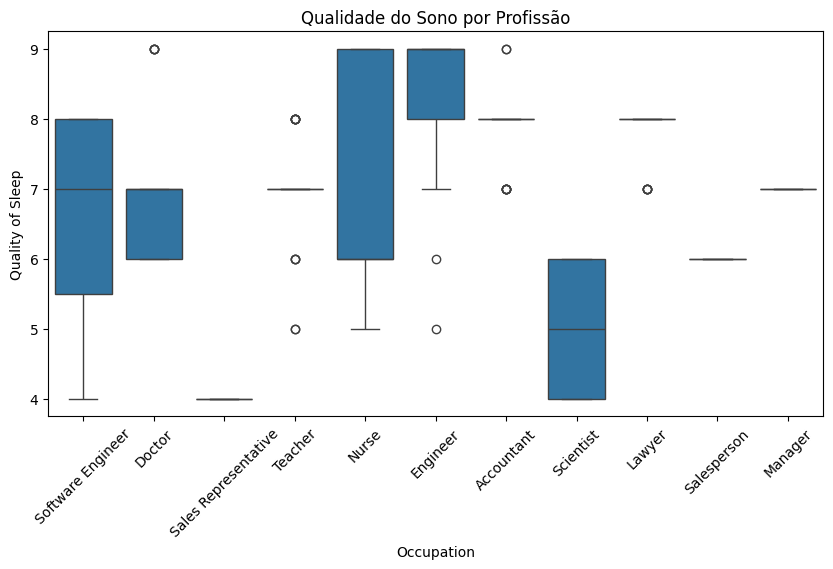

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df)
plt.xticks(rotation=45)
plt.title('Qualidade do Sono por Profissão')
plt.show()


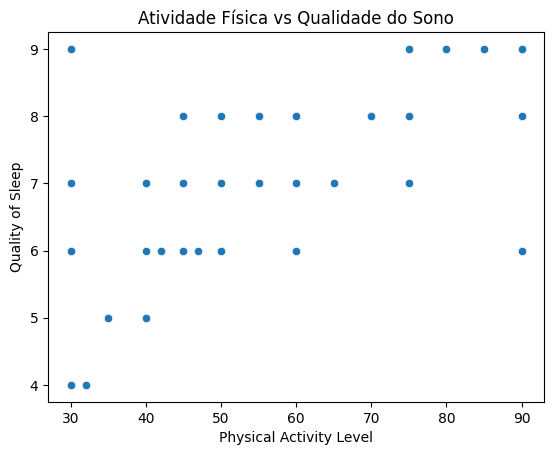

In [ ]:
sns.scatterplot(
    x='Physical Activity Level',
    y='Quality of Sleep',
    data=df
)
plt.title('Atividade Física vs Qualidade do Sono')
plt.show()


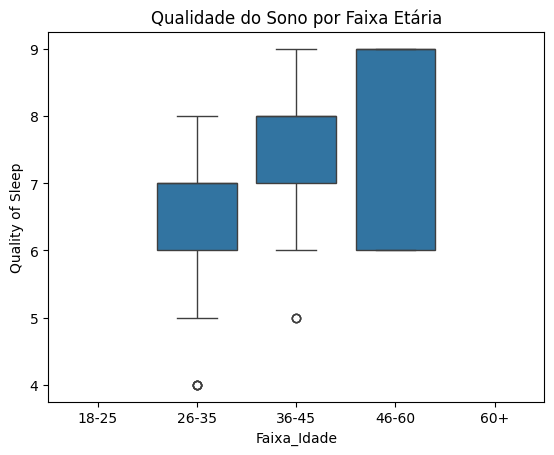

In [ ]:
df['Faixa_Idade'] = pd.cut(
    df['Age'],
    bins=[18,25,35,45,60,80],
    labels=['18-25','26-35','36-45','46-60','60+']
)

sns.boxplot(x='Faixa_Idade', y='Quality of Sleep', data=df)
plt.title('Qualidade do Sono por Faixa Etária')
plt.show()


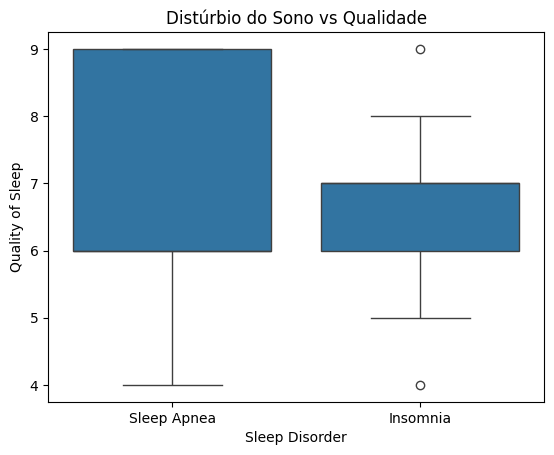

In [ ]:
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Distúrbio do Sono vs Qualidade')
plt.show()

